In [1]:
import gym
import numpy as np

In [2]:
env = gym.make('FrozenLake-v0')

[2017-06-16 16:47:22,950] Making new env: FrozenLake-v0


### Q-Learning

In [3]:
Q = np.zeros([env.observation_space.n, env.action_space.n])
lr = .8
y = .95
num_episodes = 2000

# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    while j < 99:
        j += 1
        # choose an action by greedily (with noise) picking from Q table
        a = np.argmax(Q[s, :] + np.random.randn(1, env.action_space.n) * (1. / (i + 1)))
        s1, r, d, _ = env.step(a)
        Q[s, a] = Q[s, a] + lr * (r + y * np.max(Q[s1, :]) - Q[s, a])
        rAll += r
        s = s1
        if d == True:
            break
    rList.append(rAll)

In [4]:
print("Score over time: " + str(sum(rList) / num_episodes))

Score over time: 0.5275


In [5]:
print("Final Q-Table Values")

Final Q-Table Values


### Q-learning with NN

In [6]:
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
tf.reset_default_graph()

In [15]:
inputs1 = tf.placeholder(shape=[1, 16], dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16, 4], 0, 0.01))
Qout = tf.matmul(inputs1, W)
predict = tf.argmax(Qout, 1)

nextQ = tf.placeholder(shape=[1, 4], dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)

In [16]:
init = tf.global_variables_initializer()

y = .99
e = .1
num_episodes = 2000
jList = []
rList = []

with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        while j < 99:
            j += 1
            a, allQ = sess.run([predict, Qout], feed_dict={inputs1: np.identity(16)[s: s + 1]})
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            s1, r, d, _ = env.step(a[0])
            Q1 = sess.run(Qout, feed_dict={inputs1: np.identity(16)[s1: s1 + 1]})
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0, a[0]] = r + y * maxQ1
            _, W1 = sess.run([updateModel, W], feed_dict={inputs1: np.identity(16)[s: s + 1], nextQ: targetQ})
            rAll += r
            s = s1
            if d == True:
                e = 1. / (i/50 + 10)
                break
        jList.append(j)
        rList.append(rAll)
        
print("Percent of successful episodes: " + str(sum(rList)/num_episodes) + "%")

Percent of successful episodes: 0.126%


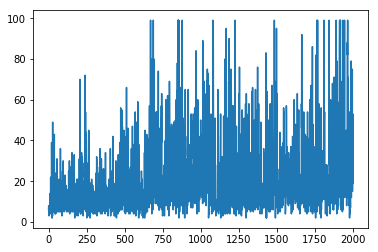

In [17]:
plt.plot(jList)

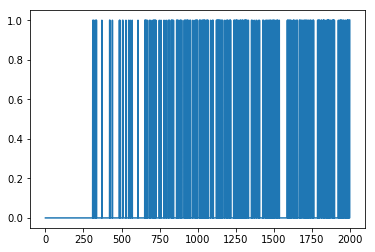

In [18]:
plt.plot(rList)